In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.set_loglevel("info")

In [2]:
BASE_DATA_DIR = "/home/fbqc9/Workspace/MCLLM_DATA/DATA"

# Input files
df_file = BASE_DATA_DIR + "/evaluation/results/BP/evaluation_all.tsv"
out_folder = BASE_DATA_DIR + "/evaluation/results/BP/"

# Set to None if you don't want to use it. Results will not be grouped/filtered by team
names_file = {
  'filename': ['naive.tsv', 'diamondblast.tsv', 'deepgose.tsv', 'sprof.tsv', 'transfew.tsv', 'Structure.tsv', 'Sequence.tsv', 'Interpro.tsv', 'Text.tsv', 'Consensus_w_structure.tsv', 'Consensus_wo_structure.tsv'],
  'group': ['naive', 'diamondblast', 'deepgose', 'sprof', 'transfew', 'structure', 'sequence', 'interpro', 'text', 'FunBind_S', 'FunBind_NS'],
  'label': ['Naive', 'DiamondBlast', 'DeepGO-SE', 'SPROF-GO', 'Transfew', 'Structure', 'Sequence', 'Interpro', 'Text', 'FunBind_S', 'FunBind_NS'],
}

# Cumulate the last column of the cols variable, e.g. "pr" --> precision, so that the curves are monotonic as in CAFA
cumulate = True

# Add extreme points to the precision-recall curves (0, 1) and (1, 0)
add_extreme_points = False

# Methods with coverage below this threshold will not be plotted
coverage_threshold = 0.1

# Select a metric
metric, cols = ('f', ['rc', 'pr'])
# metric, cols =  ('f_w', ['rc_w', 'pr_w'])
# metric, cols =  ('f_micro', ['rc_micro', 'pr_micro'])
# metric, cols =  ('f_micro_w', ['rc_micro_w', 'pr_micro_w'])
# metric, cols = ('s_w', ['ru_w', 'mi_w'])

In [3]:
# Map column names to full names (for axis labels)
axis_title_dict = {'pr': 'Precision', 'rc': 'Recall', 'f': 'F-score', 'pr_w': 'Weighted Precision', 'rc_w': 'Weighted Recall', 'f_w': 'Weighted F-score', 'mi': 'Misinformation (Unweighted)', 'ru': 'Remaining Uncertainty (Unweighted)', 'mi_w': 'Misinformation', 'ru_w': 'Remaining Uncertainty', 's': 'S-score', 'pr_micro': 'Precision (Micro)', 'rc_micro': 'Recall (Micro)', 'f_micro': 'F-score (Micro)', 'pr_micro_w': 'Weighted Precision (Micro)', 'rc_micro_w': 'Weighted Recall (Micro)', 'f_micro_w': 'Weighted F-score (Micro)'}

# Map ontology namespaces to full names (for plot titles)
# ontology_dict = {'biological_process': 'BPO', 'molecular_function': 'MFO', 'cellular_component': 'CCO'}
ontology_dict = {'biological_process': 'Biological Process', 'molecular_function': 'Molecular Function', 'cellular_component': 'Cellular Component'}

In [4]:
df = pd.read_csv(df_file, sep="\t")
df

,filename,ns,tau,n,tp,fp,fn,pr,rc,cov,...,pr_w,rc_w,cov_w,mi_w,ru_w,f_w,s_w,pr_micro_w,rc_micro_w,f_micro_w
0,deepgose.tsv,biological_process,0.001,2585.0,11.7122,63.1489,8.3578,0.1834,0.6134,1.0000,...,0.1623,0.5211,1.0000,69.9191,11.7380,0.2475,70.8975,0.1326,0.4766,0.2074
1,deepgose.tsv,biological_process,0.002,2585.0,11.7122,63.1489,8.3578,0.1834,0.6134,1.0000,...,0.1623,0.5211,1.0000,69.9191,11.7380,0.2475,70.8975,0.1326,0.4766,0.2074
2,deepgose.tsv,biological_process,0.003,2585.0,11.7122,63.1489,8.3578,0.1834,0.6134,1.0000,...,0.1623,0.5211,1.0000,69.9191,11.7380,0.2475,70.8975,0.1326,0.4766,0.2074
3,deepgose.tsv,biological_process,0.004,2585.0,11.7122,63.1489,8.3578,0.1834,0.6134,1.0000,...,0.1623,0.5211,1.0000,69.9191,11.7380,0.2475,70.8975,0.1326,0.4766,0.2074
4,deepgose.tsv,biological_process,0.005,2585.0,11.7122,63.1489,8.3578,0.1834,0.6134,1.0000,...,0.1623,0.5211,1.0000,69.9191,11.7380,0.2475,70.8975,0.1326,0.4766,0.2074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,Structure.tsv,biological_process,0.995,39.0,0.1103,0.0317,19.9598,0.7930,0.0060,0.0151,...,0.7711,0.0045,0.0151,0.0252,22.3604,0.0089,22.3604,0.7181,0.0029,0.0057
10948,Structure.tsv,biological_process,0.996,32.0,0.0797,0.0275,19.9903,0.7804,0.0046,0.0124,...,0.7677,0.0034,0.0124,0.0203,22.3796,0.0069,22.3796,0.6893,0.0020,0.0040
10949,Structure.tsv,biological_process,0.997,22.0,0.0573,0.0186,20.0128,0.7844,0.0031,0.0085,...,0.7662,0.0023,0.0085,0.0141,22.3927,0.0046,22.3927,0.6950,0.0014,0.0029
10950,Structure.tsv,biological_process,0.998,15.0,0.0356,0.0093,20.0344,0.8489,0.0018,0.0058,...,0.8445,0.0012,0.0058,0.0062,22.4055,0.0025,22.4055,0.7571,0.0009,0.0017


In [5]:
# Set method information (optional)
if names_file is None:
    df['group'] = df['filename']
    df['label'] = df['filename']
    df['is_baseline'] = False
else:
    # methods = pd.read_csv(names_file, delim_whitespace=True, header=0)
    # df = pd.merge(df, methods, on='filename', how='left')
    methods = pd.DataFrame.from_dict(names_file)
    df = pd.merge(df, methods, on='filename', how='left')
    df['group'].fillna(df['filename'], inplace=True)
    df['label'].fillna(df['filename'], inplace=True)
    if 'is_baseline' not in df:
        df['is_baseline'] = False
    else:
        df['is_baseline'].fillna(False, inplace=True)
    # print(methods)
df = df.drop(columns='filename').set_index(['group', 'label', 'ns', 'tau'])
df

/tmp/ipykernel_1244385/2355692437.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['group'].fillna(df['filename'], inplace=True)
/tmp/ipykernel_1244385/2355692437.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

n       tp       fp  \
group     label     ns                 tau                               
deepgose  DeepGO-SE biological_process 0.001  2585.0  11.7122  63.1489   
                                       0.002  2585.0  11.7122  63.1489   
                                       0.003  2585.0  11.7122  63.1489   
                                       0.004  2585.0  11.7122  63.1489   
                                       0.005  2585.0  11.7122  63.1489   
...                                              ...      ...      ...   
structure Structure biological_process 0.995    39.0   0.1103   0.0317   
                                       0.996    32.0   0.0797   0.0275   
                                       0.997    22.0   0.0573   0.0186   
                                       0.998    15.0   0.0356   0.0093   
                                       0.999     5.0   0.0112   0.0023   

                                                   fn      pr      rc     cov  \
group     label     ns                 tau                                      
deepgose  DeepGO-SE biological_process 0.001   8.3578  0.1834  0.6134  1.0000   
                                       0.002   8.3578  0.1834  0.6134  1.0000   
                                       0.003   8.3578  0.1834  0.6134  1.0000   
                                       0.004   8.3578  0.1834  0.6134  1.0000   
                                       0.005   8.3578  0.1834  0.6134  1.0000   
...                                               ...     ...     ...     ...   
structure Structure biological_process 0.995  19.9598  0.7930  0.0060  0.0151   
                                       0.996  19.9903  0.7804  0.0046  0.0124   
                                       0.997  20.0128  0.7844  0.0031  0.0085   
                                       0.998  20.0344  0.8489  0.0018  0.0058   
                                       0.999  20.0588  0.8500  0.0006  0.0019   

                                                   mi       ru       f  ...  \
group     label     ns                 tau                              ...   
deepgose  DeepGO-SE biological_process 0.001  63.1489   8.3578  0.2824  ...   
                                       0.002  63.1489   8.3578  0.2824  ...   
                                       0.003  63.1489   8.3578  0.2824  ...   
                                       0.004  63.1489   8.3578  0.2824  ...   
                                       0.005  63.1489   8.3578  0.2824  ...   
...                                               ...      ...     ...  ...   
structure Structure biological_process 0.995   0.0317  19.9598  0.0118  ...   
                                       0.996   0.0275  19.9903  0.0091  ...   
                                       0.997   0.0186  20.0128  0.0062  ...   
                                       0.998   0.0093  20.0344  0.0037  ...   
                                       0.999   0.0023  20.0588  0.0013  ...   

                                                rc_w   cov_w     mi_w  \
group     label     ns                 tau                              
deepgose  DeepGO-SE biological_process 0.001  0.5211  1.0000  69.9191   
                                       0.002  0.5211  1.0000  69.9191   
                                       0.003  0.5211  1.0000  69.9191   
                                       0.004  0.5211  1.0000  69.9191   
                                       0.005  0.5211  1.0000  69.9191   
...                                              ...     ...      ...   
structure Structure biological_process 0.995  0.0045  0.0151   0.0252   
                                       0.996  0.0034  0.0124   0.0203   
                                       0.997  0.0023  0.0085   0.0141   
                                       0.998  0.0012  0.0058   0.0062   
                                       0.999  0.0004  0.0019   0.0013   

                                                 ru_w   

In [6]:
# Filter by coverage
df = df[df['cov'] >= coverage_threshold]
df

n       tp       fp  \
group     label     ns                 tau                               
deepgose  DeepGO-SE biological_process 0.001  2585.0  11.7122  63.1489   
                                       0.002  2585.0  11.7122  63.1489   
                                       0.003  2585.0  11.7122  63.1489   
                                       0.004  2585.0  11.7122  63.1489   
                                       0.005  2585.0  11.7122  63.1489   
...                                              ...      ...      ...   
structure Structure biological_process 0.969   299.0   0.6917   0.2720   
                                       0.970   288.0   0.6696   0.2642   
                                       0.971   278.0   0.6545   0.2522   
                                       0.972   267.0   0.6298   0.2453   
                                       0.973   262.0   0.6143   0.2356   

                                                   fn      pr      rc     cov  \
group     label     ns                 tau                                      
deepgose  DeepGO-SE biological_process 0.001   8.3578  0.1834  0.6134  1.0000   
                                       0.002   8.3578  0.1834  0.6134  1.0000   
                                       0.003   8.3578  0.1834  0.6134  1.0000   
                                       0.004   8.3578  0.1834  0.6134  1.0000   
                                       0.005   8.3578  0.1834  0.6134  1.0000   
...                                               ...     ...     ...     ...   
structure Structure biological_process 0.969  19.3783  0.7785  0.0382  0.1157   
                                       0.970  19.4004  0.7767  0.0367  0.1114   
                                       0.971  19.4155  0.7793  0.0359  0.1075   
                                       0.972  19.4402  0.7780  0.0344  0.1033   
                                       0.973  19.4557  0.7746  0.0337  0.1014   

                                                   mi       ru       f  ...  \
group     label     ns                 tau                              ...   
deepgose  DeepGO-SE biological_process 0.001  63.1489   8.3578  0.2824  ...   
                                       0.002  63.1489   8.3578  0.2824  ...   
                                       0.003  63.1489   8.3578  0.2824  ...   
                                       0.004  63.1489   8.3578  0.2824  ...   
                                       0.005  63.1489   8.3578  0.2824  ...   
...                                               ...      ...     ...  ...   
structure Structure biological_process 0.969   0.2720  19.3783  0.0728  ...   
                                       0.970   0.2642  19.4004  0.0700  ...   
                                       0.971   0.2522  19.4155  0.0686  ...   
                                       0.972   0.2453  19.4402  0.0659  ...   
                                       0.973   0.2356  19.4557  0.0646  ...   

                                                rc_w   cov_w     mi_w  \
group     label     ns                 tau                              
deepgose  DeepGO-SE biological_process 0.001  0.5211  1.0000  69.9191   
                                       0.002  0.5211  1.0000  69.9191   
                                       0.003  0.5211  1.0000  69.9191   
                                       0.004  0.5211  1.0000  69.9191   
                                       0.005  0.5211  1.0000  69.9191   
...                                              ...     ...      ...   
structure Structure biological_process 0.969  0.0279  0.1157   0.2104   
                                       0.970  0.0268  0.1114   0.2037   
                                       0.971  0.0263  0.1075   0.1944   
                                       0.972  0.0254  0.1033   0.1893   
                                       0.973  0.0248  0.1014   0.1829   

                                                 ru_w   

In [7]:
# Assign colors based on group
cmap = plt.get_cmap('tab20')
df['colors'] = df.index.get_level_values('group')
df['colors'] = pd.factorize(df['colors'])[0]
df['colors'] = df['colors'].apply(lambda x: cmap.colors[x % len(cmap.colors)])
df

/tmp/ipykernel_1244385/1899990328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors'] = df.index.get_level_values('group')
/tmp/ipykernel_1244385/1899990328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors'] = pd.factorize(df['colors'])[0]
/tmp/ipykernel_1244385/1899990328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

n       tp       fp  \
group     label     ns                 tau                               
deepgose  DeepGO-SE biological_process 0.001  2585.0  11.7122  63.1489   
                                       0.002  2585.0  11.7122  63.1489   
                                       0.003  2585.0  11.7122  63.1489   
                                       0.004  2585.0  11.7122  63.1489   
                                       0.005  2585.0  11.7122  63.1489   
...                                              ...      ...      ...   
structure Structure biological_process 0.969   299.0   0.6917   0.2720   
                                       0.970   288.0   0.6696   0.2642   
                                       0.971   278.0   0.6545   0.2522   
                                       0.972   267.0   0.6298   0.2453   
                                       0.973   262.0   0.6143   0.2356   

                                                   fn      pr      rc     cov  \
group     label     ns                 tau                                      
deepgose  DeepGO-SE biological_process 0.001   8.3578  0.1834  0.6134  1.0000   
                                       0.002   8.3578  0.1834  0.6134  1.0000   
                                       0.003   8.3578  0.1834  0.6134  1.0000   
                                       0.004   8.3578  0.1834  0.6134  1.0000   
                                       0.005   8.3578  0.1834  0.6134  1.0000   
...                                               ...     ...     ...     ...   
structure Structure biological_process 0.969  19.3783  0.7785  0.0382  0.1157   
                                       0.970  19.4004  0.7767  0.0367  0.1114   
                                       0.971  19.4155  0.7793  0.0359  0.1075   
                                       0.972  19.4402  0.7780  0.0344  0.1033   
                                       0.973  19.4557  0.7746  0.0337  0.1014   

                                                   mi       ru       f  ...  \
group     label     ns                 tau                              ...   
deepgose  DeepGO-SE biological_process 0.001  63.1489   8.3578  0.2824  ...   
                                       0.002  63.1489   8.3578  0.2824  ...   
                                       0.003  63.1489   8.3578  0.2824  ...   
                                       0.004  63.1489   8.3578  0.2824  ...   
                                       0.005  63.1489   8.3578  0.2824  ...   
...                                               ...      ...     ...  ...   
structure Structure biological_process 0.969   0.2720  19.3783  0.0728  ...   
                                       0.970   0.2642  19.4004  0.0700  ...   
                                       0.971   0.2522  19.4155  0.0686  ...   
                                       0.972   0.2453  19.4402  0.0659  ...   
                                       0.973   0.2356  19.4557  0.0646  ...   

                                               cov_w     mi_w     ru_w  \
group     label     ns                 tau                               
deepgose  DeepGO-SE biological_process 0.001  1.0000  69.9191  11.7380   
                                       0.002  1.0000  69.9191  11.7380   
                                       0.003  1.0000  69.9191  11.7380   
                                       0.004  1.0000  69.9191  11.7380   
                                       0.005  1.0000  69.9191  11.7380   
...                                              ...      ...      ...   
structure Structure biological_process 0.969  0.1157   0.2104  21.9727   
                                       0.970  0.1114   0.2037  21.9873   
                                       0.971  0.1075   0.1944  21.9980   
                                       0.972  0.1033   0.1893  22.0143   
                                       0.973  0.1014   0.1829  22.0256   

                                           

In [8]:
# Identify the best methods and thresholds
index_best = df.groupby(level=['group', 'ns'])[metric].idxmax() if metric in ['f', 'f_w', 'f_micro', 'f_micro_w'] else df.groupby(['group', 'ns'])[metric].idxmin()
index_best

group         ns                
FunBind_NS    biological_process    (FunBind_NS, FunBind_NS, biological_process, 0...
FunBind_S     biological_process     (FunBind_S, FunBind_S, biological_process, 0.39)
deepgose      biological_process     (deepgose, DeepGO-SE, biological_process, 0.373)
diamondblast  biological_process    (diamondblast, DiamondBlast, biological_proces...
interpro      biological_process      (interpro, Interpro, biological_process, 0.386)
naive         biological_process            (naive, Naive, biological_process, 0.237)
sequence      biological_process      (sequence, Sequence, biological_process, 0.361)
sprof         biological_process         (sprof, SPROF-GO, biological_process, 0.199)
structure     biological_process    (structure, Structure, biological_process, 0.404)
text          biological_process              (text, Text, biological_process, 0.405)
transfew      biological_process      (transfew, Transfew, biological_process, 0.473)
Name: f, dtype: objec

In [9]:
# Filter the dataframe for the best methods
df_methods = df.reset_index('tau').loc[[ele[:-1] for ele in index_best], ['tau', 'cov', 'colors'] + cols + [metric]].sort_index()

# Makes the curves monotonic. Cumulative max on the last column of the cols variable, e.g. "pr" --> precision
if cumulate:
    if metric in ['f', 'f_w', 'f_micro', 'f_micro_w']:
        df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummax()
    else:
        df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummin()


# Save to file
df_methods.drop(columns=['colors']).to_csv('{}/fig_{}.tsv'.format(out_folder, metric), float_format="%.3f", sep="\t")
df_methods

tau     cov  \
group      label      ns                                  
FunBind_NS FunBind_NS biological_process  0.001  1.0000   
                      biological_process  0.002  1.0000   
                      biological_process  0.003  1.0000   
                      biological_process  0.004  1.0000   
                      biological_process  0.005  1.0000   
...                                         ...     ...   
transfew   Transfew   biological_process  0.995  0.2894   
                      biological_process  0.996  0.2735   
                      biological_process  0.997  0.2518   
                      biological_process  0.998  0.2244   
                      biological_process  0.999  0.1872   

                                                                                     colors  \
group      label      ns                                                                      
FunBind_NS FunBind_NS biological_process  (0.5803921568627451, 0.403921568627451, 0.7411...   
                      biological_process  (0.5803921568627451, 0.403921568627451, 0.7411...   
                      biological_process  (0.5803921568627451, 0.403921568627451, 0.7411...   
                      biological_process  (0.5803921568627451, 0.403921568627451, 0.7411...   
                      biological_process  (0.5803921568627451, 0.403921568627451, 0.7411...   
...                                                                                     ...   
transfew   Transfew   biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   

                                              rc      pr       f  
group      label      ns                                          
FunBind_NS FunBind_NS biological_process  0.7815  0.0831  0.1502  
                      biological_process  0.7815  0.0831  0.1502  
                      biological_process  0.7815  0.0831  0.1502  
                      biological_process  0.7815  0.0831  0.1502  
                      biological_process  0.7815  0.0831  0.1502  
...                                          ...     ...     ...  
transfew   Transfew   biological_process  0.0573  0.5766  0.1042  
                      biological_process  0.0524  0.5766  0.0961  
                      biological_process  0.0463  0.5766  0.0856  
                      biological_process  0.0398  0.5766  0.0744  
                      biological_process  0.0321  0.5798  0.0608  

[10681 rows x 6 columns]

In [10]:
# Add first last points to precision and recall curves to improve APS calculation
def add_points(df_):
    df_ = pd.concat([df_.iloc[0:1], df_])
    df_.iloc[0, df_.columns.get_indexer(['tau', cols[0], cols[1]])] = [0, 1, 0]  # tau, rc, pr
    df_ = pd.concat([df_, df_.iloc[-1:]])
    df_.iloc[-1, df_.columns.get_indexer(['tau', cols[0], cols[1]])] = [1.1, 0, 1]
    return df_

if metric.startswith('f') and add_extreme_points:
    df_methods = df_methods.reset_index().groupby(['group', 'label', 'ns'], as_index=False).apply(add_points).set_index(['group', 'label', 'ns'])
df_methods

tau     cov  \
group      label      ns                                  
FunBind_NS FunBind_NS biological_process  0.001  1.0000   
                      biological_process  0.002  1.0000   
                      biological_process  0.003  1.0000   
                      biological_process  0.004  1.0000   
                      biological_process  0.005  1.0000   
...                                         ...     ...   
transfew   Transfew   biological_process  0.995  0.2894   
                      biological_process  0.996  0.2735   
                      biological_process  0.997  0.2518   
                      biological_process  0.998  0.2244   
                      biological_process  0.999  0.1872   

                                                                                     colors  \
group      label      ns                                                                      
FunBind_NS FunBind_NS biological_process  (0.5803921568627451, 0.403921568627451, 0.7411...   
                      biological_process  (0.5803921568627451, 0.403921568627451, 0.7411...   
                      biological_process  (0.5803921568627451, 0.403921568627451, 0.7411...   
                      biological_process  (0.5803921568627451, 0.403921568627451, 0.7411...   
                      biological_process  (0.5803921568627451, 0.403921568627451, 0.7411...   
...                                                                                     ...   
transfew   Transfew   biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   

                                              rc      pr       f  
group      label      ns                                          
FunBind_NS FunBind_NS biological_process  0.7815  0.0831  0.1502  
                      biological_process  0.7815  0.0831  0.1502  
                      biological_process  0.7815  0.0831  0.1502  
                      biological_process  0.7815  0.0831  0.1502  
                      biological_process  0.7815  0.0831  0.1502  
...                                          ...     ...     ...  
transfew   Transfew   biological_process  0.0573  0.5766  0.1042  
                      biological_process  0.0524  0.5766  0.0961  
                      biological_process  0.0463  0.5766  0.0856  
                      biological_process  0.0398  0.5766  0.0744  
                      biological_process  0.0321  0.5798  0.0608  

[10681 rows x 6 columns]

In [11]:
# Filter the dataframe for the best method and threshold
df_best = df.loc[index_best, ['cov', 'colors'] + cols + [metric]]
df_best

,,,,cov,colors,rc,pr,f
group,label,ns,tau,,,,,
FunBind_NS,FunBind_NS,biological_process,0.411,0.9934,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.4548,0.5628,0.5031
FunBind_S,FunBind_S,biological_process,0.390,0.9981,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.4639,0.5551,0.5054
deepgose,DeepGO-SE,biological_process,0.373,0.9996,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.3645,0.4498,0.4027
diamondblast,DiamondBlast,biological_process,0.934,0.7528,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.3774,0.3214,0.3471
interpro,Interpro,biological_process,0.386,0.9505,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.4139,0.5123,0.4579
naive,Naive,biological_process,0.237,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.2256,0.3272,0.2671
sequence,Sequence,biological_process,0.361,0.9861,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.4171,0.4866,0.4492
sprof,SPROF-GO,biological_process,0.199,0.9652,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.3705,0.4707,0.4147
structure,Structure,biological_process,0.404,0.9033,"(0.5490196078431373, 0.33725490196078434, 0.29...",0.3674,0.4726,0.4134


In [12]:
# Calculate average precision score 
if metric.startswith('f'):
    df_best['aps'] = df_methods.groupby(level=['group', 'label', 'ns'])[[cols[0], cols[1]]].apply(lambda x: (x[cols[0]].diff(-1).shift(1) * x[cols[1]]).sum())
df_best
df_best.to_csv('{}/aps.tsv'.format(out_folder), float_format="%.4f", sep="\t")

In [13]:
# Calculate the max coverage across all thresholds
df_best['max_cov'] = df_methods.groupby(level=['group', 'label', 'ns'])['cov'].max()
df_best

,,,,cov,colors,rc,pr,f,aps,max_cov
group,label,ns,tau,,,,,,,
FunBind_NS,FunBind_NS,biological_process,0.411,0.9934,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.4548,0.5628,0.5031,0.426865,1.0000
FunBind_S,FunBind_S,biological_process,0.390,0.9981,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.4639,0.5551,0.5054,0.428762,1.0000
deepgose,DeepGO-SE,biological_process,0.373,0.9996,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.3645,0.4498,0.4027,0.320351,1.0000
diamondblast,DiamondBlast,biological_process,0.934,0.7528,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.3774,0.3214,0.3471,0.043049,0.7528
interpro,Interpro,biological_process,0.386,0.9505,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.4139,0.5123,0.4579,0.355335,0.9536
naive,Naive,biological_process,0.237,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.2256,0.3272,0.2671,0.144606,1.0000
sequence,Sequence,biological_process,0.361,0.9861,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.4171,0.4866,0.4492,0.329984,1.0000
sprof,SPROF-GO,biological_process,0.199,0.9652,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.3705,0.4707,0.4147,0.329381,1.0000
structure,Structure,biological_process,0.404,0.9033,"(0.5490196078431373, 0.33725490196078434, 0.29...",0.3674,0.4726,0.4134,0.299402,0.9079


In [14]:
# Set a label column for the plot legend
df_best['label'] = df_best.index.get_level_values('label')
if 'aps' not in df_best.columns:
    df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} C={x['max_cov']:.3f})", axis=1)
else:
    df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} APS={x['aps']:.3f} C={x['max_cov']:.3f})", axis=1)
df_best

,,,,cov,colors,rc,pr,f,aps,max_cov,label
group,label,ns,tau,,,,,,,,
FunBind_NS,FunBind_NS,biological_process,0.411,0.9934,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.4548,0.5628,0.5031,0.426865,1.0000,FunBind_NS (F=0.503 APS=0.427 C=1.000)
FunBind_S,FunBind_S,biological_process,0.390,0.9981,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.4639,0.5551,0.5054,0.428762,1.0000,FunBind_S (F=0.505 APS=0.429 C=1.000)
deepgose,DeepGO-SE,biological_process,0.373,0.9996,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.3645,0.4498,0.4027,0.320351,1.0000,DeepGO-SE (F=0.403 APS=0.320 C=1.000)
diamondblast,DiamondBlast,biological_process,0.934,0.7528,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.3774,0.3214,0.3471,0.043049,0.7528,DiamondBlast (F=0.347 APS=0.043 C=0.753)
interpro,Interpro,biological_process,0.386,0.9505,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.4139,0.5123,0.4579,0.355335,0.9536,Interpro (F=0.458 APS=0.355 C=0.954)
naive,Naive,biological_process,0.237,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.2256,0.3272,0.2671,0.144606,1.0000,Naive (F=0.267 APS=0.145 C=1.000)
sequence,Sequence,biological_process,0.361,0.9861,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.4171,0.4866,0.4492,0.329984,1.0000,Sequence (F=0.449 APS=0.330 C=1.000)
sprof,SPROF-GO,biological_process,0.199,0.9652,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.3705,0.4707,0.4147,0.329381,1.0000,SPROF-GO (F=0.415 APS=0.329 C=1.000)
structure,Structure,biological_process,0.404,0.9033,"(0.5490196078431373, 0.33725490196078434, 0.29...",0.3674,0.4726,0.4134,0.299402,0.9079,Structure (F=0.413 APS=0.299 C=0.908)


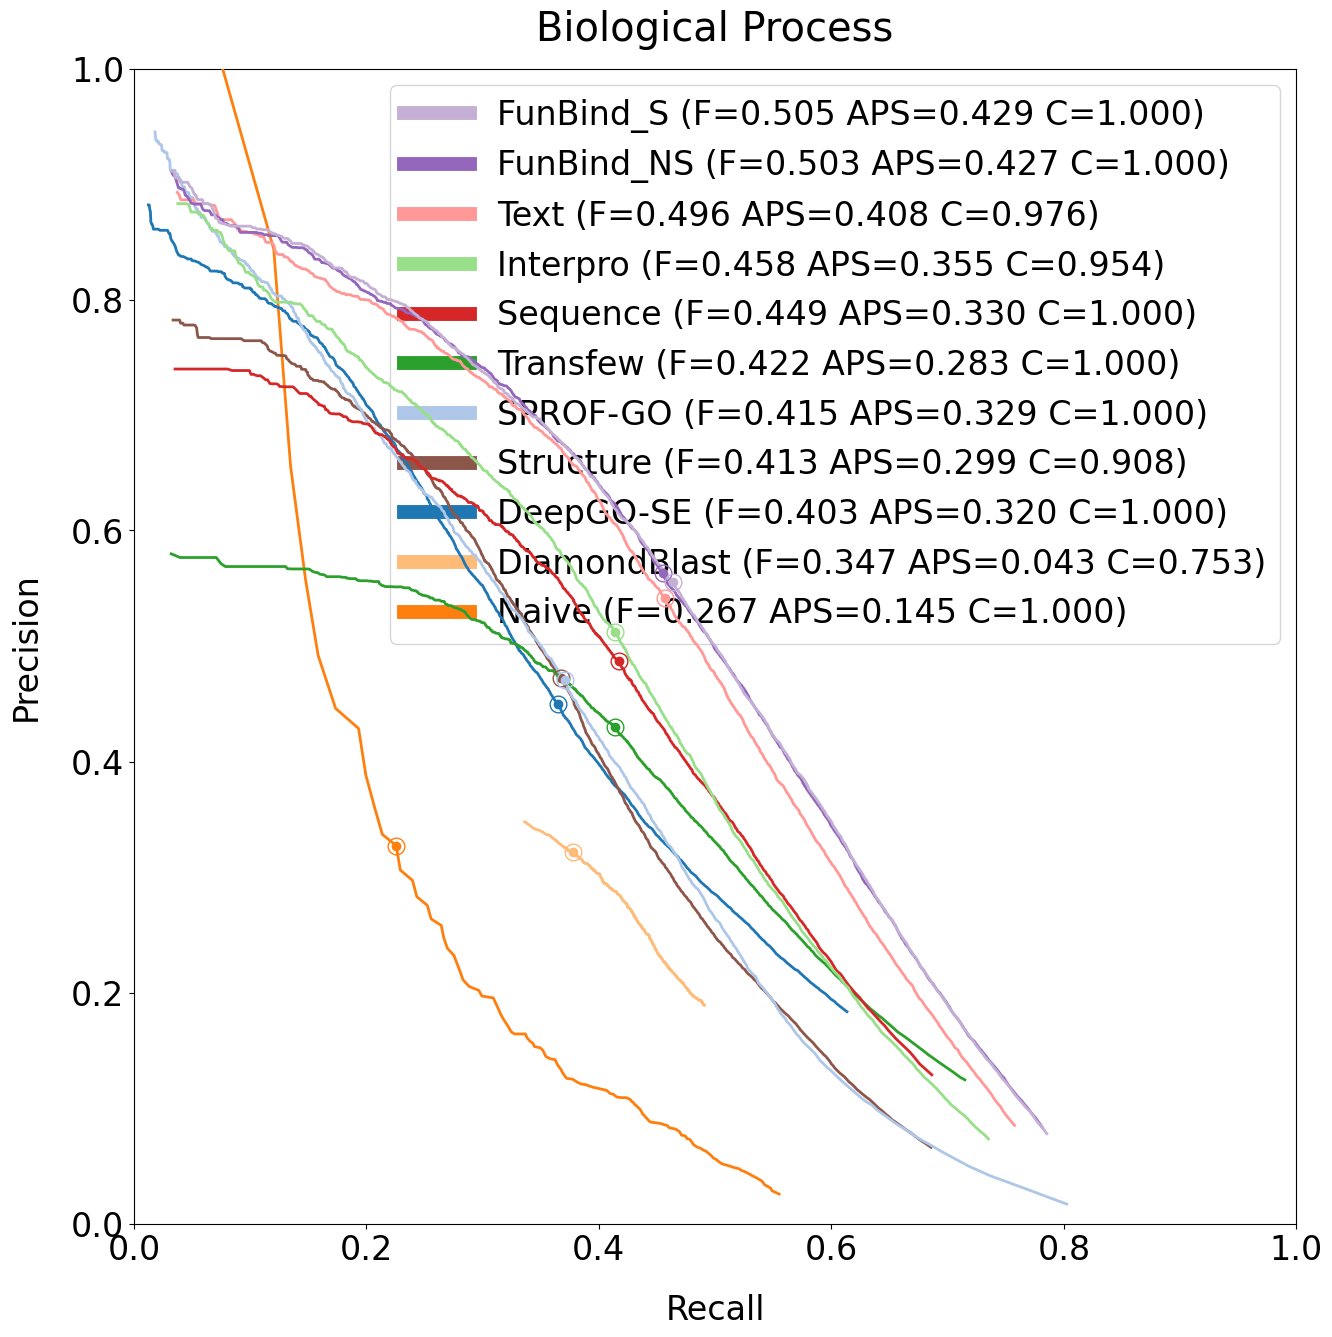

In [15]:
# Generate the figures
plt.rcParams.update({'font.size': 24, 'legend.fontsize': 24})

# F-score contour lines
x = np.arange(0.01, 1, 0.01)
y = np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x, y)
Z = 2 * X * Y / (X + Y)

for ns, df_g in df_best.groupby(level='ns'):
    fig, ax = plt.subplots(figsize=(15, 15))

     # Contour lines. At the moment they are provided only for the F-score
    #if metric.startswith('f'):
        #CS = ax.contour(X, Y, Z, np.arange(0.1, 1.0, 0.1), colors='gray')
     #   ax.clabel(CS, inline=True) #, fontsize=10)

    # Iterate methods
    for i, (index, row) in enumerate(df_g.sort_values(by=[metric, 'max_cov'], ascending=[False if metric.startswith('f') else True, False]).iterrows()):
        data = df_methods.loc[index[:-1]]
        
        # Precision-recall or mi-ru curves
        ax.plot(data[cols[0]], data[cols[1]], color=row['colors'], label=row['label'], lw=2, zorder=500-i)
        
        # F-max or S-min dots
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=12, mfc='none', zorder=1000-i)
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=6, zorder=1000-i)

    # Set axes limit
    if metric.startswith('f'):
        plt.xlim(0, 1)
        plt.ylim(0, 1)
   
    # plt.xlim(0, max(1, df_best.loc[:,:,ns,:][cols[0]].max()))
    # plt.ylim(0, max(1, df_best.loc[:,:,ns,:][cols[1]].max()))

    # Set titles
    ax.set_title(ontology_dict.get(ns, ns), pad=20)
    ax.set_xlabel(axis_title_dict[cols[0]], labelpad=20)
    ax.set_ylabel(axis_title_dict[cols[1]], labelpad=20)
    
    # Legend
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    leg = ax.legend(markerscale=6)
    for legobj in leg.get_lines():
        legobj.set_linewidth(10.0)

    # Save figure on disk
    plt.savefig("{}/fig_{}_{}.png".format(out_folder, metric, ns), bbox_inches='tight', dpi=300, transparent=True)
    # plt.clf()